# Scaling the 2d Acoustic Wave Equation

## Unscaled version

2d Acoustic Wave Equation: $\frac{\partial^2 p}{\partial t^2} = c^2 \nabla^2 p + s(x, z, t)$

Where $ p \equiv p(x, z, t) $ and $ s(x, z, t) $ is a source term

In [2]:
# import dependencies 
from devito import *
from examples.seismic.source import DGaussSource, TimeAxis
from examples.seismic import plot_image

# Initial grid: 1km x 1km, with spacing 100m
extent = (2000., 2000.)
shape = (100, 100)
x = SpaceDimension(name='x', spacing=Constant(name='h_x', value=extent[0]/(shape[0]-1)))
z = SpaceDimension(name='z', spacing=Constant(name='h_z', value=extent[1]/(shape[1]-1)))
grid = Grid(extent=extent, shape=shape, dimensions=(x, z))

# Timestep size from Eq. 7 with V_p=6000. and dx=100
t0, tn = 0., 200.
dt = 1e2*(1. / np.sqrt(2.)) / 60.
time_range = TimeAxis(start=t0, stop=tn, step=dt)

src = DGaussSource(name='src', grid=grid, f0=0.01, time_range=time_range, a=0.004)
src.coordinates.data[:] = [1000., 1000.]

# Now we create the velocity and pressure fields
p = TimeFunction(name='p', grid=grid, space_order=2, time_order=2)

# We need some initial conditions
V_p = 5.0

# The source injection term
src_p = src.inject(field=p.forward, expr=src)

# 2nd order acoustic
pde = p.dt2 - V_p * V_p * p.laplace
stencil = Eq(p.forward, solve(pde, p.forward))

# set up operator
op_2 = Operator([stencil] + src_p)

# Propagate the source
op_2(time=src.time_range.num-1, dt=dt)

Operator `Kernel` ran in 0.01 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=0.000791999999999999, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section1', rank=None),
                     PerfEntry(time=5.999999999999999e-06, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

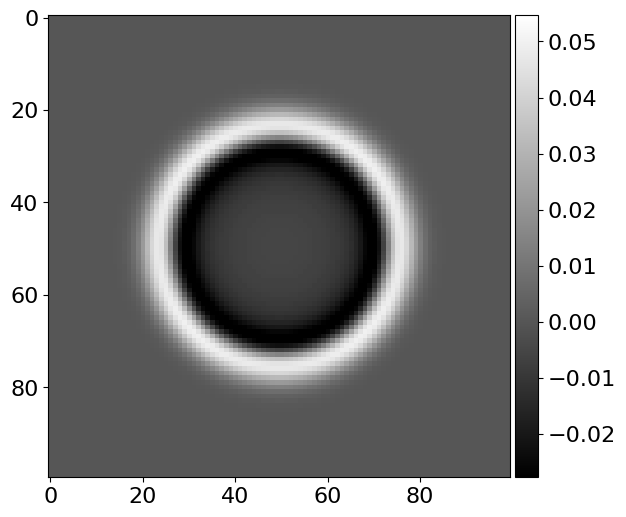

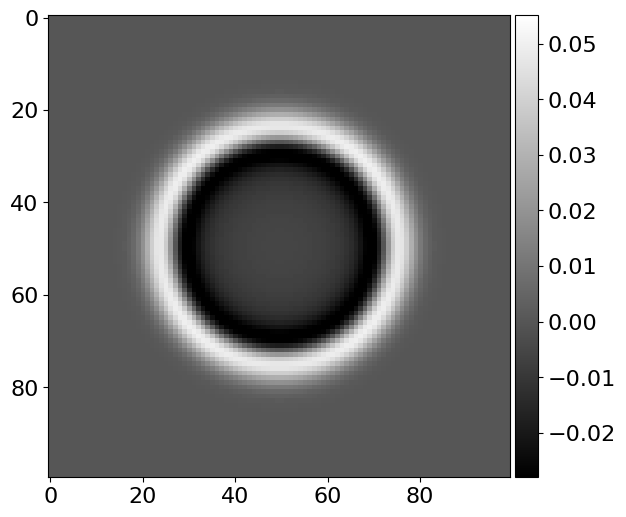

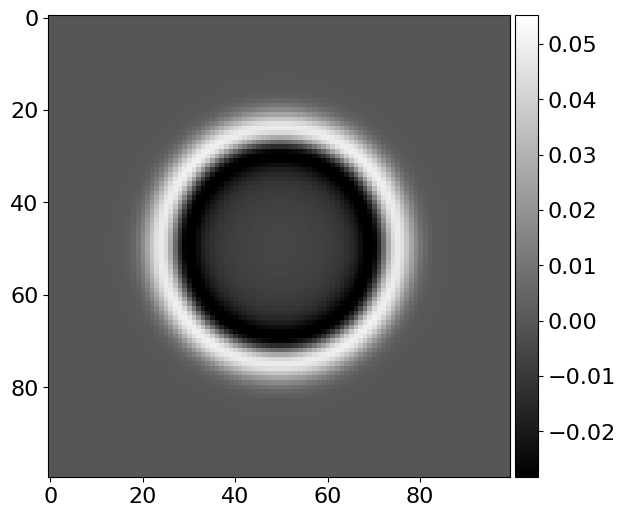

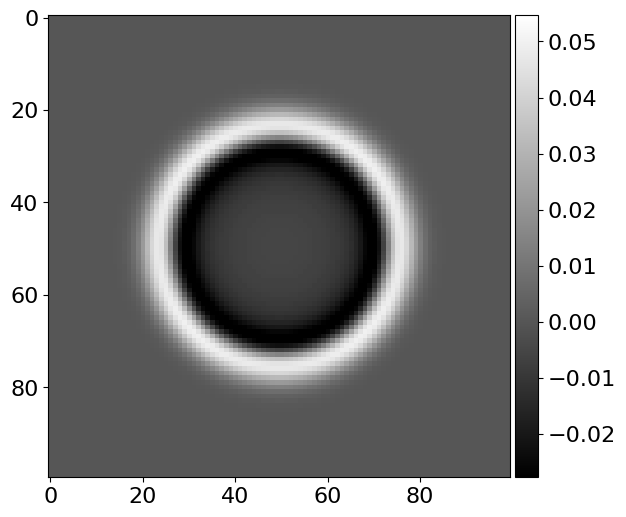

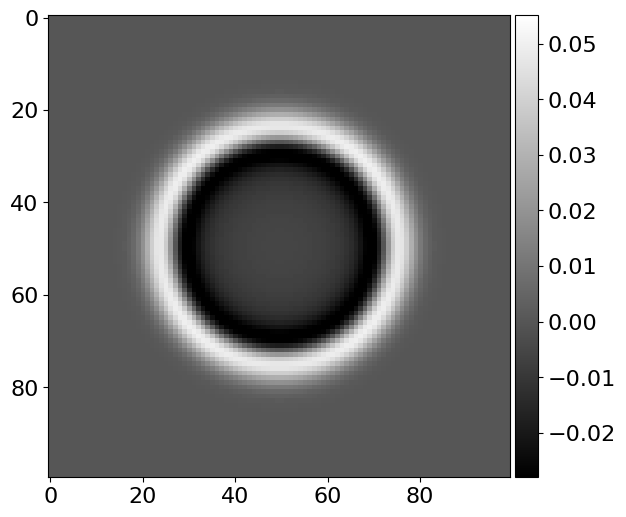

In [3]:
plot_image(p.data[0])
plot_image(p.data[20])
plot_image(p.data[40])
plot_image(p.data[60])
plot_image(p.data[80])